In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [24]:
data_train_path = 'E:\Likhon\East West University\EWU Spring 2024\CSE366\Assignment\Assignment 3\CoLeaf DATASET'

In [25]:
img_width = 150
img_height = 150

In [26]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False
)

category = data_train.class_names
print(category)

Found 1006 files belonging to 10 classes.
['boron-B', 'calcium-Ca', 'healthy', 'iron-Fe', 'magnesium-Mg', 'manganese-Mn', 'more-deficiencies', 'nitrogen-N', 'phosphorus-P', 'potasium-K']


In [27]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 10,
    validation_split = False
)

Found 1006 files belonging to 10 classes.


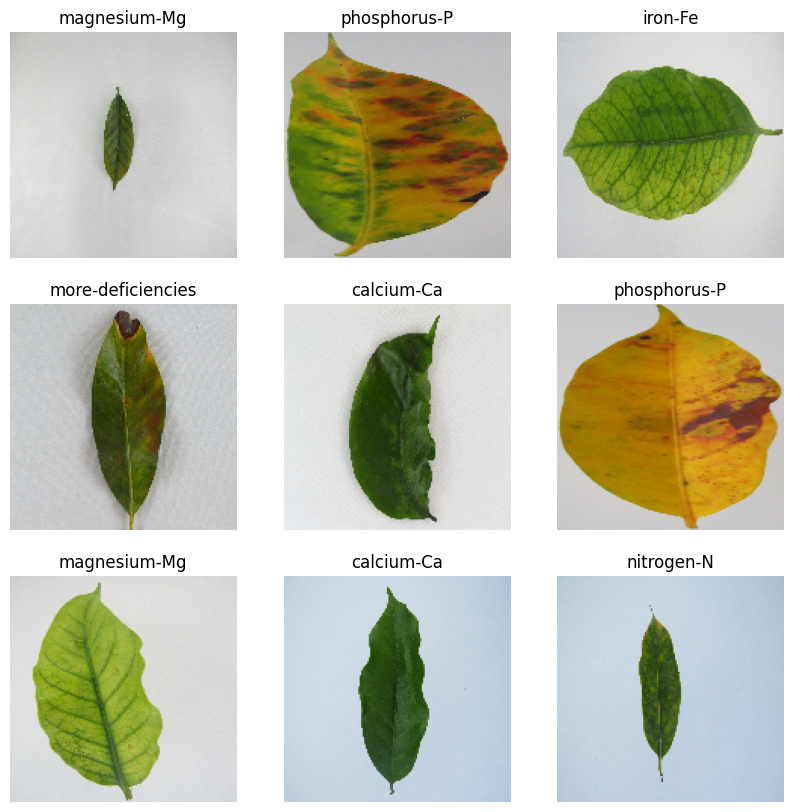

In [28]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(category[labels[i]])
        plt.axis('off')

# Traning Model 

In [29]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(category))
])

In [30]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [31]:
history = model.fit(data_train, validation_data=data_test, epochs=20)

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 398ms/step - accuracy: 0.2826 - loss: 2.1931 - val_accuracy: 0.4871 - val_loss: 1.4818
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 391ms/step - accuracy: 0.4139 - loss: 1.6559 - val_accuracy: 0.5249 - val_loss: 1.3432
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 396ms/step - accuracy: 0.5156 - loss: 1.3784 - val_accuracy: 0.5815 - val_loss: 1.1390
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.5725 - loss: 1.2580 - val_accuracy: 0.6799 - val_loss: 0.9255
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 394ms/step - accuracy: 0.6206 - loss: 1.0599 - val_accuracy: 0.6889 - val_loss: 0.8429
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 369ms/step - accuracy: 0.6980 - loss: 0.8349 - val_accuracy: 0.7744 - val_loss: 0.6626
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 383ms/step - accuracy: 0.7367 - loss: 0.7101 - val_accuracy: 0.8002 - val_loss: 0.6038
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 37s 368ms/step - accuracy: 0.7952 - loss: 0

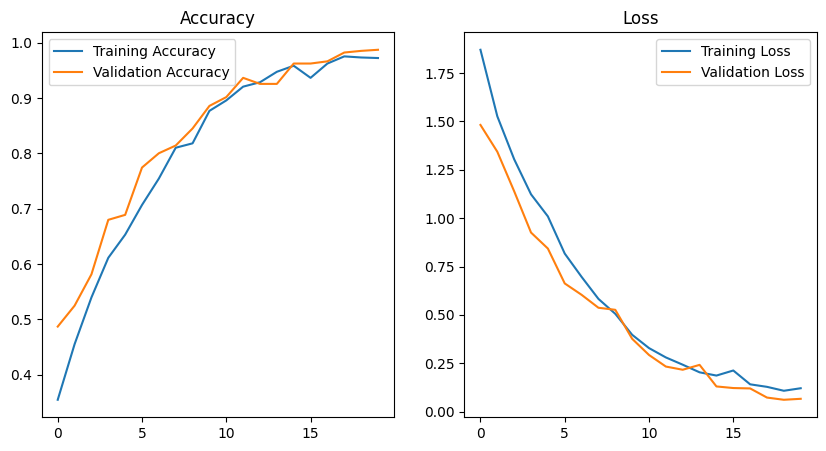

In [32]:
epochs_range = range(20)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend(loc='bottom right')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.legend()

In [33]:
image = r"E:\Likhon\East West University\EWU Spring 2024\CSE366\Assignment\Leaf\Mn.jpg"
image = tf.keras.utils.load_img(image, target_size=(150, 150))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [34]:
predict = model.predict(img_batch)
score = tf.nn.softmax(predict)
print('This is {} with accuracy of {:0.2f}'.format(category[np.argmax(score)], np.max(score)*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
This is manganese-Mn with accuracy of 100.00


In [35]:
model.save('CNN_CoLeaf.keras')